In [44]:

using CSV
using Plots
using DataFrames
using Statistics
#using GARCH
using StatsBase

In [2]:
df = CSV.read("Square.csv")

,Date,GSPC_adj_price,GSPC_log_ret,BTC_adj_price,BTC_log_ret,NVDA_adj_price
,String,String,Float64,Float64,Float64,Float64
1,4/30/13,"1,597.57",0.0,139.0,0.0,12.8508
2,5/1/13,"1,582.70",-0.00935147,116.99,-0.172385,12.7388
3,5/2/13,"1,597.59",0.009364,105.21,-0.10613,12.8881
4,5/3/13,"1,614.42",0.0104796,97.75,-0.0735452,12.9441
5,5/6/13,"1,617.50",0.00190596,112.3,0.138761,12.9068
6,5/7/13,"1,625.96",0.00521664,111.5,-0.00714927,12.7388
7,5/8/13,"1,632.69",0.00413054,113.57,0.0183948,12.9721
8,5/9/13,"1,626.67",-0.00369392,112.67,-0.00795619,12.9814
9,5/10/13,"1,633.70",0.00431234,117.2,0.0394187,13.5694


In [5]:
feature_names = names(df)
for i in 1:9
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	Date			String
2	GSPC_adj_price			String
3	GSPC_log_ret			Float64
4	BTC_adj_price			Float64
5	BTC_log_ret			Float64
6	NVDA_adj_price			Float64
7	NVDA_log_ret			Float64
8	Gold_adj_price			Float64
9	Gold_log_ret			Float64


In [6]:
#do not shuffle since we want the most recent data to be our test data

train_proportion = 0.8
n = size(df, 1)
println("Size of dataset: ", string(n))

ntrain = convert(Int, round(train_proportion*n))

target = df[:, :BTC_adj_price]
data = df[:, filter(col -> (col != :BTC_adj_price && col!= :BTC_log_ret), feature_names)]

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:] #rows , cols
# the following variable records the features of examples in the test set
test_x = data[ntrain + 1:end,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain + 1:end,:]

# let's take a look
train_x

Size of dataset: 1617


,Date,GSPC_adj_price,GSPC_log_ret,NVDA_adj_price,NVDA_log_ret,Gold_adj_price
,String,String,Float64,Float64,Float64,Float64
1,4/30/13,"1,597.57",0.0,12.8508,0.0,1469.31
2,5/1/13,"1,582.70",-0.00935147,12.7388,-0.00875283,1473.18
3,5/2/13,"1,597.59",0.009364,12.8881,0.0116533,1455.11
4,5/3/13,"1,614.42",0.0104796,12.9441,0.00433529,1474.56
5,5/6/13,"1,617.50",0.00190596,12.9068,-0.00288802,1473.96
6,5/7/13,"1,625.96",0.00521664,12.7388,-0.0131006,1465.31
7,5/8/13,"1,632.69",0.00413054,12.9721,0.0181494,1452.41
8,5/9/13,"1,626.67",-0.00369392,12.9814,0.000718976,1470.54
9,5/10/13,"1,633.70",0.00431234,13.5694,0.0442956,1456.71


In [7]:
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end

string_to_float (generic function with 1 method)

In [8]:
labels_real = [
  
  :GSPC_log_ret,
    :NVDA_adj_price,
    :NVDA_log_ret,
    :Gold_adj_price,
    :Gold_log_ret
]

labels_string = [
    :GSPC_adj_price,
]

1-element Array{Symbol,1}:
 :GSPC_adj_price

In [9]:
# the following variable should have as many columns as real variables, and as many rows as examples in the training set      
train_vals_real = train_x[:,labels_real]
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals_real = test_x[:,labels_real]

,GSPC_log_ret,NVDA_adj_price,NVDA_log_ret,Gold_adj_price,Gold_log_ret
,Float64,Float64,Float64,Float64,Float64
1,-0.00403152,258.948,-0.018734,1281.32,0.00118698
2,0.00171069,261.078,0.00819172,1272.22,-0.00712739
3,-0.00636573,255.903,-0.020023,1266.95,-0.00415097
4,0.0018602,249.772,-0.0242504,1267.51,0.000441909
5,-0.0138197,237.997,-0.0482883,1268.9,0.00109604
6,0.00220215,240.854,0.0119309,1264.14,-0.00375833
7,-0.00864159,234.613,-0.0262518,1256.2,-0.00630076
8,0.00615968,239.729,0.0215712,1251.04,-0.00411609
9,0.000758116,235.787,-0.0165778,1249.0,-0.00163197


In [11]:
# the following variable should have as many columns as string variables, and as many rows as examples in the training set      
train_vals_from_string = convert(Matrix, string_to_float.(train_x[:,labels_string]))
# the following variable should have as many columns as string variables, and as many rows as examples in the test set      
test_vals_from_string = convert(Matrix, string_to_float.(test_x[:,labels_string]))
@assert(eltype(train_vals_from_string) != String)
@assert(eltype(test_vals_from_string) != String)

In [12]:
Xtrain = hcat(convert(Matrix,train_vals_real),train_vals_from_string, ones(nrow(train_vals_real)))
Xtest = hcat(convert(Matrix,test_vals_real),test_vals_from_string, ones(nrow(test_vals_real)))

323×7 Array{Float64,2}:
 -0.00403152   258.948  -0.018734    1281.32   0.00118698   0.0  1.0
  0.00171069   261.078   0.00819172  1272.22  -0.00712739   0.0  1.0
 -0.00636573   255.903  -0.020023    1266.95  -0.00415097   0.0  1.0
  0.0018602    249.772  -0.0242504   1267.51   0.000441909  0.0  1.0
 -0.0138197    237.997  -0.0482883   1268.9    0.00109604   0.0  1.0
  0.00220215   240.854   0.0119309   1264.14  -0.00375833   0.0  1.0
 -0.00864159   234.613  -0.0262518   1256.2   -0.00630076   0.0  1.0
  0.00615968   239.729   0.0215712   1251.04  -0.00411609   0.0  1.0
  0.000758116  235.787  -0.0165778   1249.0   -0.00163197   0.0  1.0
  0.00306326   241.102   0.0222908   1250.86   0.00148808   0.0  1.0
 -0.00495963   235.728  -0.0225441   1242.73  -0.00652074   0.0  1.0
  0.00858386   241.59    0.0245648   1254.48   0.00941057   0.0  1.0
  0.00844552   246.169   0.0187738   1255.13   0.000518009  0.0  1.0
  ⋮                                                         ⋮       
 -0.000724

In [16]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    "Fill this in."
    return mean((y-pred) .* (y-pred))
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 323)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [17]:
# The weights of your linear equation (compute via least squares)
w = Xtrain\train_y

train_pred = Xtrain * w
test_pred = Xtest * w

train_MSE = MSE(train_y, train_pred)
test_MSE = MSE(test_y, test_pred)

7.497654108071792e6

Train MSE	2.9935554287756206e6
Test MSE 	7.497654108071792e6


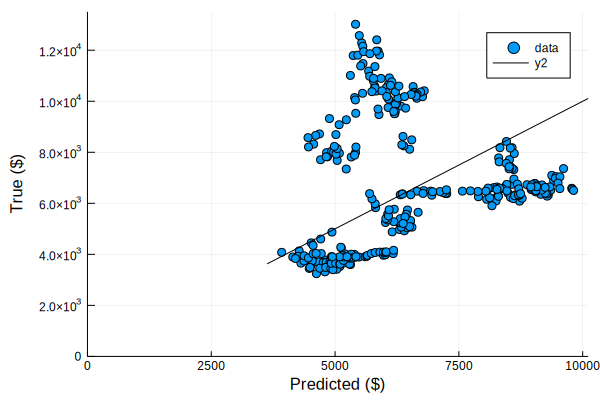

In [18]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

In [28]:
ret = df[:, :BTC_log_ret]

1617-element Array{Float64,1}:
  0.0       
 -0.17238547
 -0.10613011
 -0.07354515
  0.13876066
 -0.00714927
  0.0183948 
 -0.00795619
  0.03941868
  0.00663324
 -0.05649053
  0.02410182
  0.03897824
  ⋮         
 -0.00477405
 -0.00811737
 -0.00346232
 -0.0042095 
  0.00666126
 -0.0082913 
 -0.04544209
 -0.1209928 
 -0.01561681
 -0.0443311 
  0.01623412
  0.00507927

In [45]:
fit = garchFit(ret)

Fitted garch model 
 * Coefficient(s):    ω              α              β              
                      0.00010249     0.13257        0.83723        
 * Log Likelihood: 2712
 * Converged: true
 * Solver status: XTOL_REACHED

 * Standardised Residuals Tests:
                             Statistic      p-Value        
   Jarque-Bera Test     χ²   3619.1         0              

 * Error Analysis:
          Estimate       Std.Error      t value        Pr(>|t|)       
   ω      0.00010249     2.221e-05     4.6147         3.9366e-06     
   α      0.13257        0.019353       6.8501         7.381e-12     
   β      0.83723        0.021581       38.794         0              


In [46]:
yT1 = predict(fit, 323)

323-element Array{Float64,1}:
 0.04499703697862192 
 0.045454217939082775
 0.045893243651037294
 0.04631503747850178 
 0.04672045748924737 
 0.04711030280922536 
 0.04748531918308389 
 0.04784620386037872 
 0.048193609906220555
 0.04852815001834386 
 0.04885039991903305 
 0.04916090137932228 
 0.04946016492387069 
 ⋮                   
 0.05825873496899573 
 0.058258760598751645
 0.05825878545456557 
 0.058258809559808555
 0.058258832937145885
 0.05825885560855839 
 0.05825887759536313 
 0.05825889891823342 
 0.058258919597218295
 0.05825893965176134 
 0.05825895910071899 
 0.058258977962378236

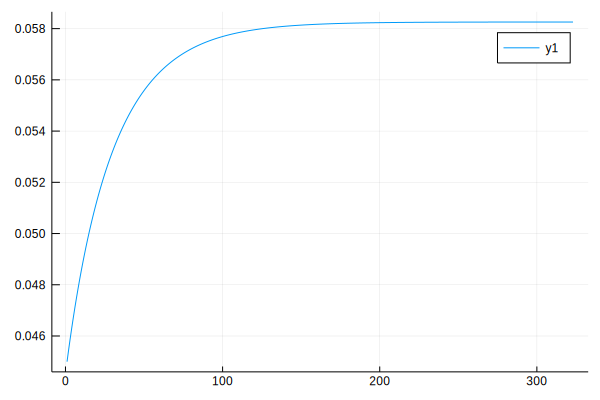

In [47]:
plot(yT1)

In [49]:
pacf(ret, 30)

MethodError: MethodError: no method matching pacf(::Array{Float64,1}, ::Int64)
Closest candidates are:
  pacf(::AbstractArray{T<:Real,1}, !Matched::AbstractArray{T,1} where T<:Integer; method) where T<:Real at C:\Users\trebi\.julia\packages\StatsBase\DyWPR\src\signalcorr.jl:581